<img src='https://gazetadasemana.com.br/images/noticias/78040/30064552_altaLOGOS_.png.png' width=500>

# Artificial Neural Network with treated that
Authorship: Raul Macedo

Creates ANN with the first samples of data generated on `data_treatment.ipynb`

### Cases explanation:
- Case 1: All features (Result from Logistic Regression with penalty l1)
- Case 2: Take away T-TPT and P-MON-CKP (Result from scikit learn Lasso model)
- Case 3: Take away P-TPT and P-MON-CKP (Result from PCA) 

All ANN are created with MLPClassifier and it's parameters are determined by GridSearchCV: Cross validation along many different combinations of parameters.

In [39]:
#General imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from utils import train_model_if_doesnt_exist,save_csv_if_doesnt_exist


### Definindo teste e treino

In [7]:
train1 = pd.read_csv('./feature_selection_results/train1.csv').drop(columns=["Unnamed: 0"]).rename(columns={'0':'class'})
train2 = pd.read_csv('./feature_selection_results/train2.csv').drop(columns=["Unnamed: 0"]).rename(columns={'0':'class'})
train3 = pd.read_csv('./feature_selection_results/train3.csv').drop(columns=["Unnamed: 0"]).rename(columns={'0':'class'})
test1 = pd.read_csv('./feature_selection_results/test1.csv').drop(columns=["Unnamed: 0"]).rename(columns={'0':'class'})
test2 = pd.read_csv('./feature_selection_results/test2.csv').drop(columns=["Unnamed: 0"]).rename(columns={'0':'class'})
test3 = pd.read_csv('./feature_selection_results/test3.csv').drop(columns=["Unnamed: 0"]).rename(columns={'0':'class'})

In [8]:
train_in1 = train1.drop(columns=['class']).copy()
test_in1 = test1.drop(columns=['class']).copy()
train_out1 = pd.DataFrame(train1['class'])
test_out1 = pd.DataFrame(test1['class'])

train_in2 = train2.drop(columns=['class']).copy()
test_in2 = test2.drop(columns=['class']).copy()
train_out2 = pd.DataFrame(train2['class'])
test_out2 = pd.DataFrame(test2['class'])

train_in3 = train3.drop(columns=['class']).copy()
test_in3 = test3.drop(columns=['class']).copy()
train_out3 = pd.DataFrame(train3['class'])
test_out3 = pd.DataFrame(test3['class'])

### **Normalização dos dados**
Será realizada normalização dos dados para 0 e 1

In [9]:

def normalize_data(data,range_=(0,1)):
  scaler = MinMaxScaler(feature_range=range_)
  return scaler.fit_transform(data),scaler


train_in1n,scaler_train_in1n = normalize_data(train_in1)
test_in1n,scaler_test_in1n = normalize_data(test_in1)
train_out1n,scaler_train_out1n = normalize_data(train_out1)
test_out1n,scaler_test_out1n = normalize_data(test_out1)

train_in2n,scaler_train_in2n = normalize_data(train_in2)
test_in2n,scaler_test_in2n = normalize_data(test_in2)
train_out2n,scaler_train_out2n = normalize_data(train_out2)
test_out2n,scaler_test_out2n = normalize_data(test_out2)

train_in3n,scaler_train_in3n = normalize_data(train_in3)
test_in3n,scaler_test_in3n = normalize_data(test_in3)
train_out3n,scaler_train_out3n = normalize_data(train_out3)
test_out3n,scaler_test_out3n = normalize_data(test_out3)


train_out1n = np.ravel(train_out1n)
train_out2n = np.ravel(train_out2n)
train_out3n = np.ravel(train_out3n)


## **Using GridSearchCV to determine MLP parameters and train model - Case 1**

In [10]:
parameters1 = {
    'hidden_layer_sizes': [(6,),(10,),(15,),(6,6),(6,4,4)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
ultron1 = train_model_if_doesnt_exist(train_in1n,train_out1n,parameters1,'./ann_models/pre_data_filling/ultron1_PRP.pkl')


In [11]:
ultron1

MLPClassifier(activation='tanh', hidden_layer_sizes=(6, 6), max_iter=100)

Text(0, 0.5, 'erro')

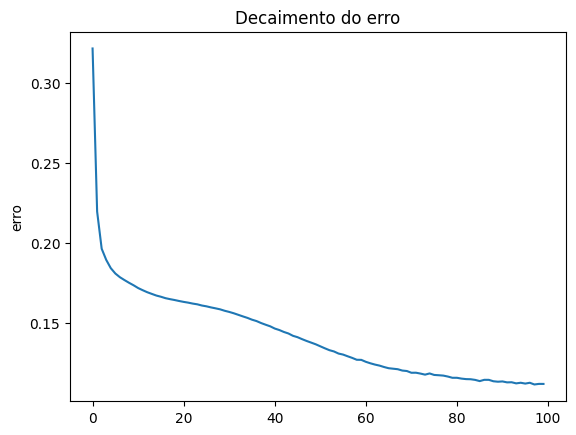

In [12]:
plt.plot(ultron1.loss_curve_)
plt.title('Decaimento do erro')
plt.ylabel('erro')


### **Analising model with test data - case 1**


In [57]:
out1_pred = ultron1.predict(test_in1n)

- Denormalize data

In [58]:
out1_pred_df = pd.DataFrame(out1_pred)
out_des_pred1 = scaler_test_out1n.inverse_transform(out1_pred_df)

In [59]:

def plot_confusion_matrix(observed_data:np.ndarray,predicted_data:np.ndarray):
    mat = confusion_matrix(observed_data,predicted_data)
    sns.heatmap(mat.T,square=True,annot=True,fmt='d',linewidths=1)
    plt.xlabel('Observed')
    plt.ylabel('Predict')
    return

def save_classifaction_report(observed_data,predicted_data,file_name:str):
    cls_report = classification_report(observed_data,predicted_data,output_dict=True)
    cls_report_df = pd.DataFrame(cls_report)
    accuracy = accuracy_score(observed_data,predicted_data)
    cls_report_df['accuracy'] = accuracy
    save_csv_if_doesnt_exist(cls_report_df,file_name)
    print(cls_report_df)
    return

                    0.0           5.0  accuracy      macro avg   weighted avg
precision      0.835781      0.953387  0.946529       0.894584       0.942492
recall         0.526143      0.989446  0.946529       0.757795       0.946529
f1-score       0.645763      0.971082  0.946529       0.808423       0.940946
support    10060.000000  98540.000000  0.946529  108600.000000  108600.000000


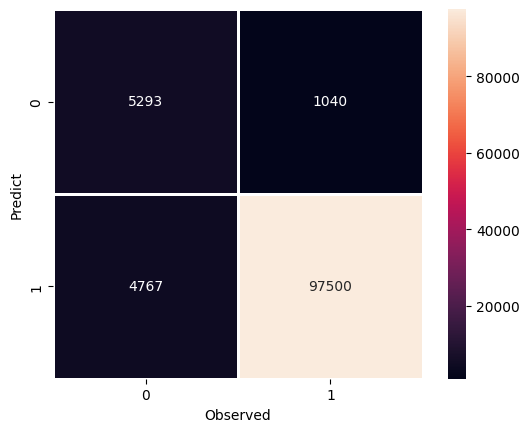

In [60]:
save_classifaction_report(test_out1,out_des_pred1,'./ann_models/pre_data_filling/reports/ultron1_test_report.pkl')
plot_confusion_matrix(test_out1,out_des_pred1)

### **Analising model with train data - case 1**


                    0.0            5.0  accuracy      macro avg   weighted avg
precision      0.849951       0.952324  0.946586       0.901137       0.942840
recall         0.514207       0.990732  0.946586       0.752469       0.946586
f1-score       0.640762       0.971148  0.946586       0.805955       0.940541
support    23475.000000  229923.000000  0.946586  253398.000000  253398.000000


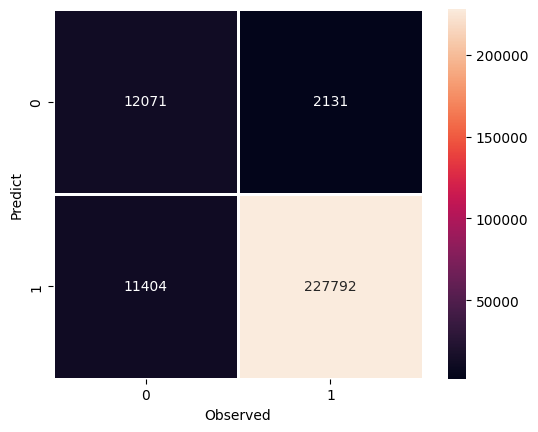

In [61]:
out1_pred = ultron1.predict(train_in1n)
out1_pred_df = pd.DataFrame(out1_pred)
out_des_pred1 = scaler_train_out1n.inverse_transform(out1_pred_df)

save_classifaction_report(train_out1,out_des_pred1,'./ann_models/pre_data_filling/reports/ultron1_train_report.pkl')
plot_confusion_matrix(train_out1,out_des_pred1)

# **Case 2 - Taking away T-TPT & P-MON-CKP**


## **Using GridSearchCV to determine MLP parameters and train model - Case 2**

In [17]:
parameters2 = {
    'hidden_layer_sizes': [(4,),(10,),(15,),(4,6),(6,4,4)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
ultron2 = train_model_if_doesnt_exist(train_in2n,train_out2n,parameters2,'./ann_models/pre_data_filling/ultron2_PRP.pkl')


In [18]:
ultron2

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(6, 4, 4),
              max_iter=100)

Text(0, 0.5, 'erro')

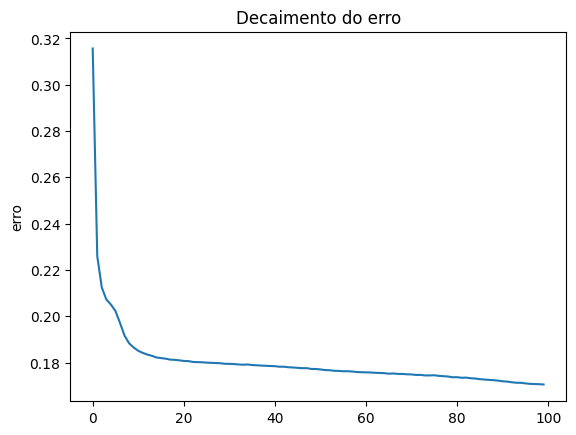

In [19]:
plt.plot(ultron2.loss_curve_)
plt.title('Decaimento do erro')
plt.ylabel('erro')

### **Analising model with test data - case 2**


In [62]:
out2_pred = ultron2.predict(test_in2n)

In [63]:
out2_pred_df = pd.DataFrame(out2_pred)
out_des_pred2 = scaler_test_out2n.inverse_transform(out2_pred_df)

                    0.0           5.0  accuracy      macro avg   weighted avg
precision      0.985203      0.943406  0.945018       0.964304       0.947269
recall         0.411278      0.999371  0.945018       0.705325       0.945018
f1-score       0.580305      0.970582  0.945018       0.775444       0.934512
support    10037.000000  98563.000000  0.945018  108600.000000  108600.000000


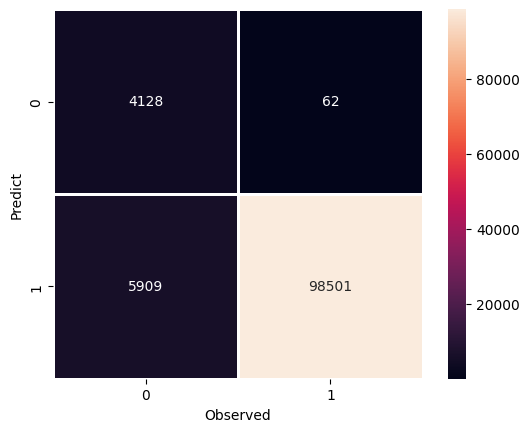

In [64]:
save_classifaction_report(test_out2,out_des_pred2,'./ann_models/pre_data_filling/reports/ultron2_test_report.pkl')
plot_confusion_matrix(test_out2,out_des_pred2)

### **Analising model with train data - case 2**


                    0.0            5.0  accuracy      macro avg   weighted avg
precision      0.975649       0.943619  0.944885       0.959634       0.946589
recall         0.416035       0.998939  0.944885       0.707487       0.944885
f1-score       0.583328       0.970491  0.944885       0.776910       0.934589
support    23498.000000  229900.000000  0.944885  253398.000000  253398.000000


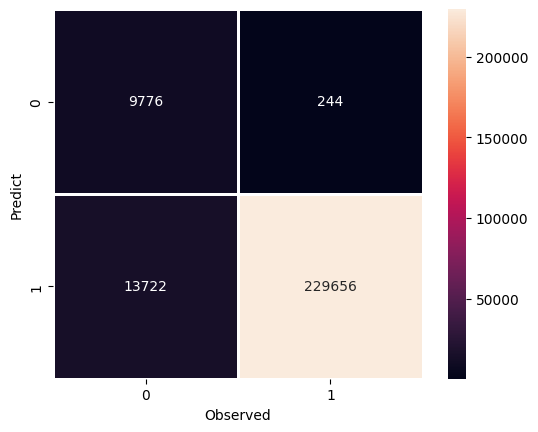

In [65]:
out2_pred = ultron2.predict(train_in2n)
out2_pred_df = pd.DataFrame(out2_pred)
out_des_pred2 = scaler_train_out2n.inverse_transform(out2_pred_df)
save_classifaction_report(train_out2,out_des_pred2,'./ann_models/pre_data_filling/reports/ultron2_train_report.pkl')
plot_confusion_matrix(train_out2,out_des_pred2)

# Case 3: Desconsiderando P-TPT e P-MON-CKP

### **Definindo parâmetros da rede com GridSearch - Caso 3**

In [24]:
parameters3 = {
    'hidden_layer_sizes': [(4,),(10,),(15,),(4,6),(6,4,4)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
ultron3 = train_model_if_doesnt_exist(train_in3n,train_out3n,parameters3,'./ann_models/pre_data_filling/ultron3_PRP.pkl')


In [25]:
ultron3

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(6, 4, 4),
              learning_rate='adaptive', max_iter=100)

Text(0, 0.5, 'erro')

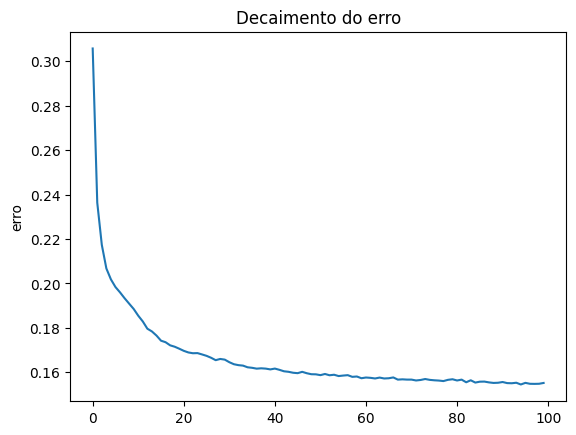

In [26]:
plt.plot(ultron3.loss_curve_)
plt.title('Decaimento do erro')
plt.ylabel('erro')

### **Analising model with test data - case 3**


In [66]:
out3_pred = ultron3.predict(test_in3n)

In [67]:
out3_pred_df = pd.DataFrame(out3_pred)
out_des_pred3 = scaler_test_out3n.inverse_transform(out3_pred_df)

                   0.0           5.0  accuracy      macro avg   weighted avg
precision     0.693486      0.964199  0.941087       0.828843       0.939307
recall        0.643901      0.971181  0.941087       0.807541       0.941087
f1-score      0.667774      0.967677  0.941087       0.817726       0.940101
support    9986.000000  98614.000000  0.941087  108600.000000  108600.000000


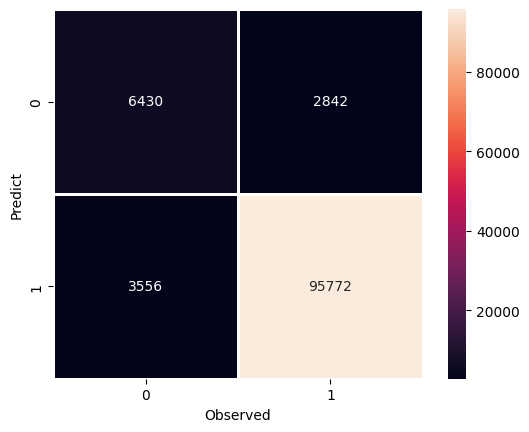

In [68]:
save_classifaction_report(test_out3,out_des_pred3,'./ann_models/pre_data_filling/reports/ultron3_test_report.pkl')
plot_confusion_matrix(test_out3,out_des_pred3)

### **Analising model with train data - case 3**


              precision    recall  f1-score   support

         0.0       0.70      0.64      0.67     23549
         5.0       0.96      0.97      0.97    229849

    accuracy                           0.94    253398
   macro avg       0.83      0.80      0.82    253398
weighted avg       0.94      0.94      0.94    253398

Accuracy is  0.9407414423160404


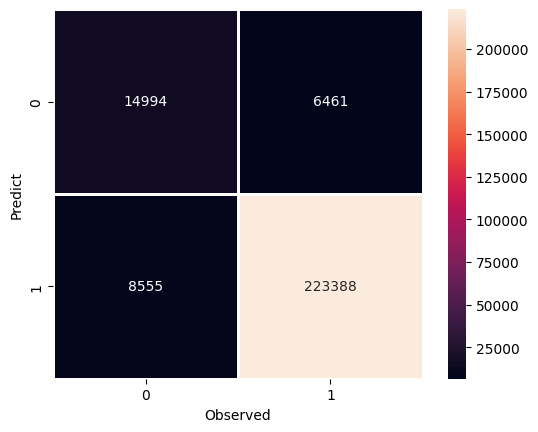

In [30]:
out3_pred = ultron3.predict(train_in3n)
out3_pred_df = pd.DataFrame(out3_pred)
out_des_pred3 = scaler_train_out3n.inverse_transform(out3_pred_df)

plot_confusion_matrix(train_out3,out_des_pred3)